In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(color_codes=True)
import time

import numpy as np
import pandas as pd
from sklearn.neighbors import KernelDensity
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn import manifold
from sklearn.cluster import AgglomerativeClustering
from sklearn import decomposition
from sklearn.neighbors import kneighbors_graph
from sklearn.cluster import MeanShift, estimate_bandwidth
from itertools import cycle

from LatLonToTWD97 import LatLonToTWD97

SyntaxError: invalid syntax (<ipython-input-3-70bc0c87ae16>, line 19)

In [5]:
X= pd.read_csv('./tmp/big_table.csv')

In [7]:
X.head()

,pet,rent,space,101:Food,102:Supermarket,201:Bus,202:MRT,203:UBike,204:Train,205:Exam,...,304:Museum,305:Theater,401:Park,402:Scenic,403:Sport,501:School,502:Hospital,503:Pharmacy,504:Police,505:FireStation
0,0,25000,62.34,-20.690013,-21.150177,-21.197688,-22.016565,-22.078798,-23.818845,-20.763704,...,-21.344104,-35.143631,-19.832454,-19.526913,-20.361726,-21.793622,-21.625844,-23.361540,-21.906159,-21.819031
1,0,32000,50.70,-29.418300,-21.889287,-22.285826,-22.832456,-22.543544,-24.738320,-22.244460,...,-21.739857,-41.770144,-20.666102,-21.221613,-21.728591,-22.215835,-22.034202,-24.561982,-22.298620,-22.241080
2,0,25000,44.97,-20.076350,-21.296837,-21.731911,-21.742753,-21.986086,-23.519200,-20.897927,...,-21.251749,-32.216696,-20.373445,-20.070019,-20.628840,-21.686197,-21.466098,-22.801697,-21.756647,-21.676334
3,0,5000,7.00,-18.322282,-21.146282,-21.160755,-21.730500,-21.913950,-23.389006,-20.689591,...,-21.215287,-32.858452,-19.895306,-19.265852,-20.328033,-21.655434,-21.489876,-22.908381,-21.741798,-21.630667
4,0,6000,7.99,-21.883530,-24.074363,-30.514663,-24.571018,-22.389492,-21.093035,-22.398776,...,-22.287442,-33.924655,-22.219667,-23.843253,-21.268603,-22.364983,-22.166921,-25.454403,-22.267152,-22.194877


In [8]:
def flow(x):
    return np.exp(x)

In [16]:
# 取e
X.loc[:, '101:Food':'505:FireStation'] = X.loc[:, '101:Food':'505:FireStation'].apply(flow)

In [18]:
X.head()

,pet,rent,space,101:Food,102:Supermarket,201:Bus,202:MRT,203:UBike,204:Train,205:Exam,...,304:Museum,305:Theater,401:Park,402:Scenic,403:Sport,501:School,502:Hospital,503:Pharmacy,504:Police,505:FireStation
0,0,25000,62.34,1.033811e-09,6.525216e-10,6.222444e-10,2.743641e-10,2.578102e-10,4.524882e-11,9.603686e-10,...,5.374936e-10,5.461537e-16,2.437108e-09,3.308031e-09,1.435538e-09,3.428863e-10,4.055227e-10,7.148453e-11,3.063911e-10,3.342836e-10
1,0,32000,50.70,1.674150e-13,3.116042e-10,2.095988e-10,1.213362e-10,1.619806e-10,1.804197e-11,2.184508e-10,...,3.618262e-10,7.235309e-19,1.058829e-09,6.075340e-10,3.659256e-10,2.247944e-10,2.695675e-10,2.152121e-11,2.069341e-10,2.191906e-10
2,0,25000,44.97,1.909643e-09,5.635096e-10,3.647129e-10,3.607798e-10,2.828551e-10,6.105781e-11,8.397414e-10,...,5.894984e-10,1.019687e-14,1.418813e-09,1.921770e-09,1.099028e-09,3.817722e-10,4.757647e-10,1.251263e-10,3.558020e-10,3.855563e-10
3,0,5000,7.00,1.103403e-08,6.550678e-10,6.456553e-10,3.652277e-10,3.040131e-10,6.954787e-11,1.034249e-09,...,6.113896e-10,5.367299e-15,2.288644e-09,4.294840e-09,1.484730e-09,3.936990e-10,4.645851e-10,1.124648e-10,3.611247e-10,4.035716e-10
4,0,6000,7.99,3.134035e-10,3.504588e-11,5.593072e-14,2.132761e-11,1.889589e-10,6.908936e-10,1.872127e-10,...,2.092603e-10,1.848032e-15,2.239345e-10,4.415774e-11,5.796464e-10,1.936472e-10,2.360633e-10,8.816437e-12,2.135497e-10,2.295554e-10


In [20]:
# standardlizationZ = linkage(X1, 'ward')
sd = StandardScaler()
X1 = sd.fit_transform(X)

In [21]:
X1[:10]

array([[-0.48679842, -0.03707579,  1.94681972, -0.80749065, -1.51021422,
        -1.22243232, -1.60482477, -1.75813348, -2.54688287, -1.17236476,
        -2.02568226, -1.47879823, -0.98558592, -0.90816255, -2.0190222 ,
        -1.35536059, -1.0632162 ,  0.48946214,  2.37141594, -0.52505305,
        -1.88910217, -1.88455245, -1.49442888, -2.16099807, -2.20240275],
       [-0.48679842,  0.25933627,  1.36712646, -0.95533274, -1.76256005,
        -1.39134731, -1.71674155, -1.83901678, -2.61634707, -1.68105651,
        -2.23527951, -1.53684652, -1.13196388, -0.90816255, -2.16345306,
        -1.4937455 , -1.06321633, -0.32971903, -0.77230364, -1.31354888,
        -2.03525934, -2.08981375, -1.52063264, -2.42411742, -2.47771507],
       [-0.48679842, -0.03707579,  1.081762  , -0.68222052, -1.57610058,
        -1.3278519 , -1.54162469, -1.73699473, -2.50651955, -1.25507212,
        -1.9352718 , -1.50732377, -0.99847918, -0.90816255, -1.94879568,
        -1.31439289, -1.06321379, -0.11576232,  0

In [22]:
Z = linkage(X1, 'ward')

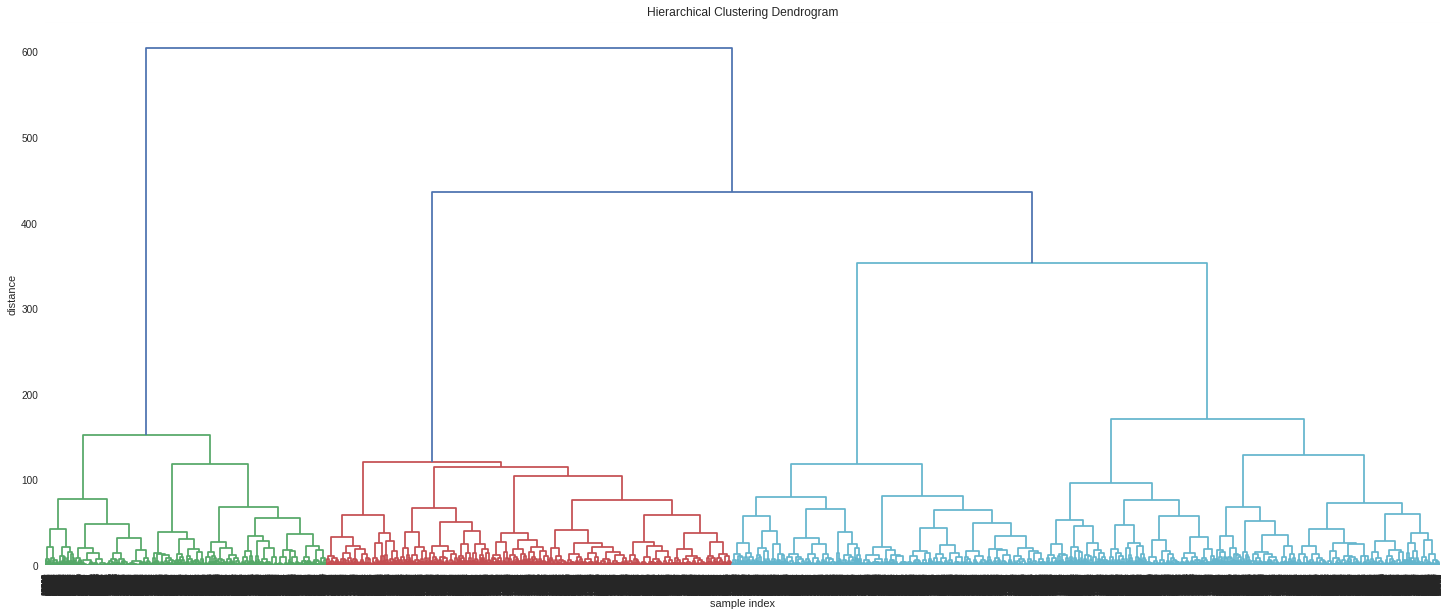

In [23]:
# Hierarchical Clustering
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

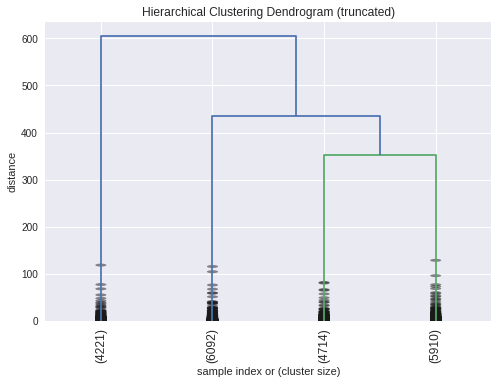

In [24]:
# 4 truncated
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=4,  # show only the last p merged clusters
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.show()

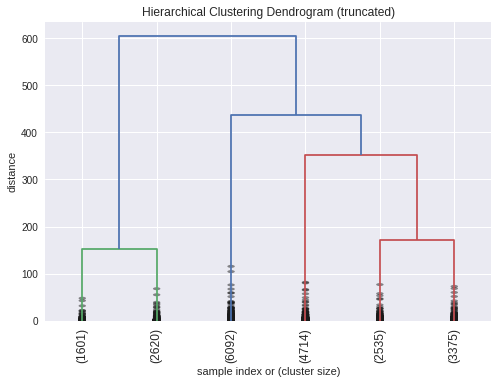

In [25]:
# 6 truncated
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=6,  # show only the last p merged clusters
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.show()

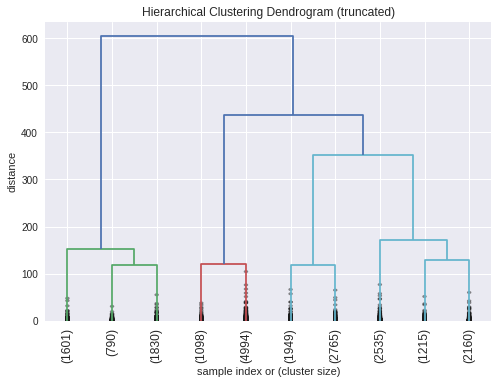

In [26]:
# 10 truncated
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=10,  # show only the last p merged clusters
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.show()

In [27]:
Hclustering_10 = AgglomerativeClustering(n_clusters=10,
 affinity="euclidean", linkage="ward")

In [88]:
Hclustering_4 = AgglomerativeClustering(n_clusters=4,
 affinity="euclidean", linkage="ward")

In [28]:
#non-linear decomposition
X_red = manifold.SpectralEmbedding(n_components=2).fit_transform(X1)

In [38]:
pca = decomposition.PCA(n_components=2)
X_green = pca.fit_transform(X1)

In [30]:
HC_10_r = Hclustering_10.fit(X_red)

In [39]:
HC_10_g = Hclustering_10.fit(X_green)

In [89]:
HC_4_g = Hclustering_4.fit(X_green)

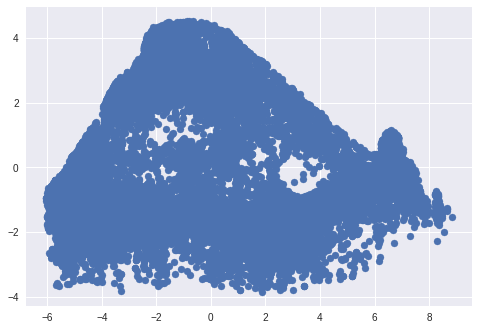

In [68]:
plt.scatter(X_green[:, 0], X_green[:, 1])

In [33]:
def plot_clustering(X_red, labels, title=None):
#     x_min, x_max = np.min(X_red, axis=0), np.max(X_red, axis=0)
#     X_red = (X_red - x_min) / (x_max - x_min)
    plt.figure(figsize=(6, 4))
    for i in range(X_red.shape[0]):
        plt.scatter(X_red[i, 0], X_red[i, 1], color=plt.cm.spectral(labels[i] / 10.))
#         str(y[i])
    plt.xticks([])
    plt.yticks([])
    if title is not None:
        plt.title(title, size=17)
    plt.axis('off')
    plt.tight_layout()
    plt.show()



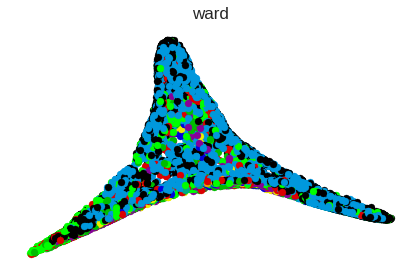

In [35]:
plot_clustering(X_red, HC_10_r.labels_, "ward")
# Standarlization data without e

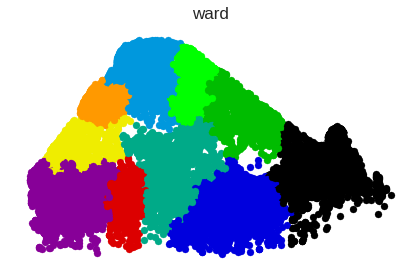

In [40]:
plot_clustering(X_green, HC_10_g.labels_, "ward")
# Standarlization data without e

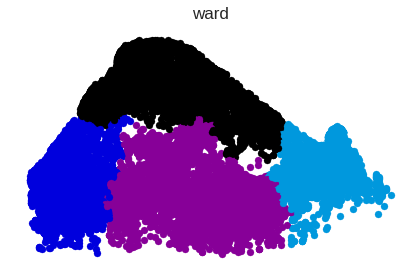

In [90]:
plot_clustering(X_green, HC_4_g.labels_, "ward")

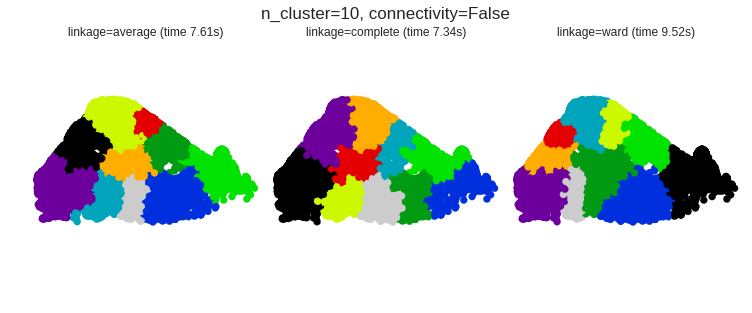

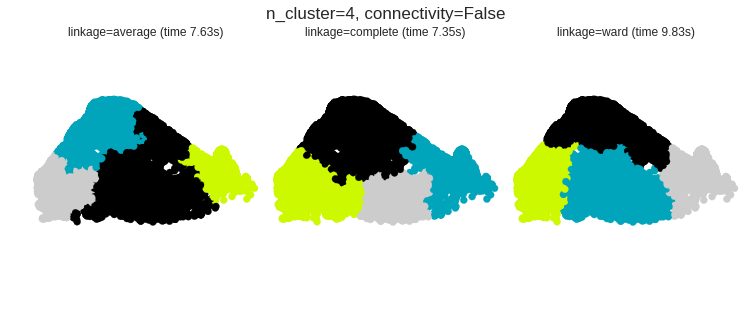

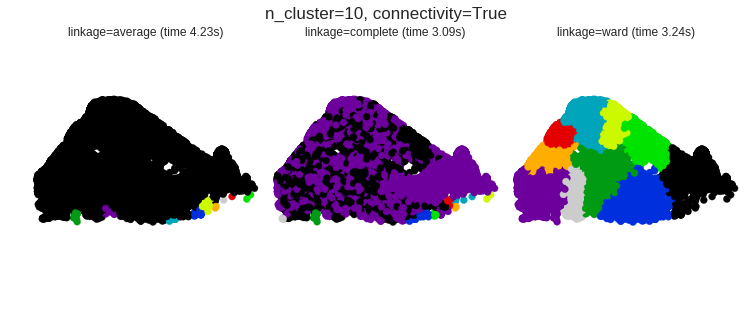

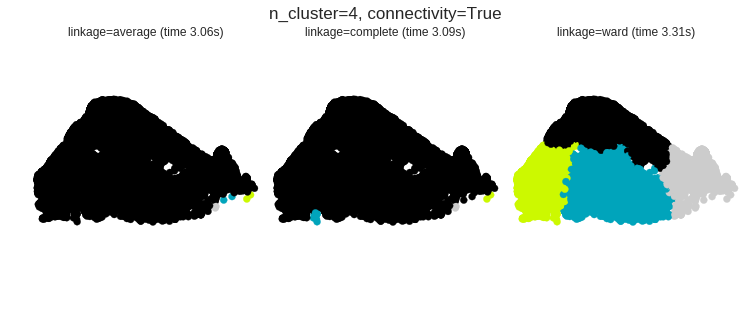

In [44]:
knn_graph = kneighbors_graph(X_green, 30, include_self=False)
for connectivity in (None, knn_graph):
    for n_clusters in (10, 4):
        plt.figure(figsize=(10, 4))
        for index, linkage_method in enumerate(('average', 'complete', 'ward')):
            plt.subplot(1, 3, index + 1)
            model = AgglomerativeClustering(linkage=linkage_method,
                                            connectivity=connectivity,
                                            n_clusters=n_clusters)
            t0 = time.time()
            model.fit(X_green)
            elapsed_time = time.time() - t0
            plt.scatter(X_green[:, 0], X_green[:, 1], c=model.labels_,
                        cmap=plt.cm.spectral)
            plt.title('linkage=%s (time %.2fs)' % (linkage_method, elapsed_time),
                      fontdict=dict(verticalalignment='top'))
            plt.axis('equal')
            plt.axis('off')

            plt.subplots_adjust(bottom=0, top=.89, wspace=0,
                                left=0, right=1)
            plt.suptitle('n_cluster=%i, connectivity=%r' %
                         (n_clusters, connectivity is not None), size=17)


plt.show()
# Standarlization data without e

number of estimated clusters : 4


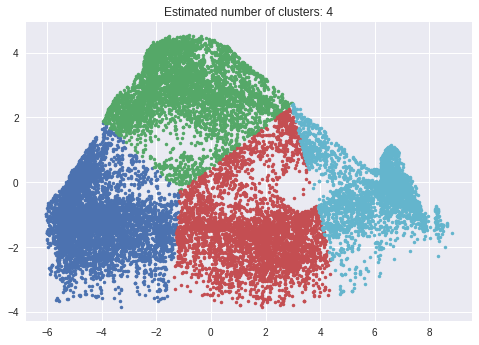

In [64]:
# mean-shift 
bandwidth = estimate_bandwidth(X_green, quantile=0.2, n_samples=500)
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_green)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)
print("number of estimated clusters : %d" % n_clusters_)
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.plot(X_green[my_members, 0], X_green[my_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

In [53]:
labels

array([3, 3, 3, ..., 1, 2, 1])

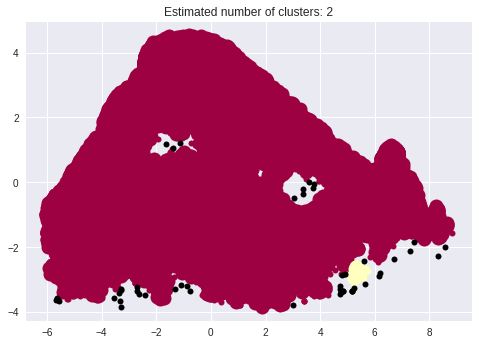

In [63]:
# DBSCAN
from sklearn.cluster import DBSCAN
from sklearn import metrics
db = DBSCAN(eps=0.3, min_samples=10).fit(X_green)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X_green[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X_green[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

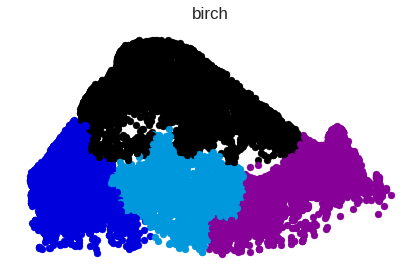

In [74]:
# birch
import matplotlib.colors as colors
from sklearn.cluster import Birch, MiniBatchKMeans
birch = Birch(n_clusters=n_clusters)
birch.fit_transform(X_green)
plot_clustering(X_green, birch.labels_, "birch")

In [72]:
birch.labels_

array([1, 1, 1, ..., 0, 3, 0])

In [100]:
import itertools

from sklearn import mixture
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt
import matplotlib as mpl

color_iter = itertools.cycle(['navy', 'c', 'cornflowerblue', 'gold',
                              'darkorange'])

def plot_results(X, Y_, means, covariances, index, title):
    splot = plt.subplot(2, 1, 1 + index)
    for i, (mean, covar, color) in enumerate(zip(
            means, covariances, color_iter)):
        v, w = linalg.eigh(covar)
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        u = w[0] / linalg.norm(w[0])
        # as the DP will not use every component it has access to
        # unless it needs it, we shouldn't plot the redundant
        # components.
        if not np.any(Y_ == i):
            continue
        plt.scatter(X[Y_ == i, 0], X[Y_ == i, 1], .8, color=color)

        # Plot an ellipse to show the Gaussian component
        angle = np.arctan(u[1] / u[0])
        angle = 180. * angle / np.pi  # convert to degrees
        ell = mpl.patches.Ellipse(mean, v[0], v[1], 180. + angle, color=color)
        ell.set_clip_box(splot.bbox)
        ell.set_alpha(0.5)
        splot.add_artist(ell)


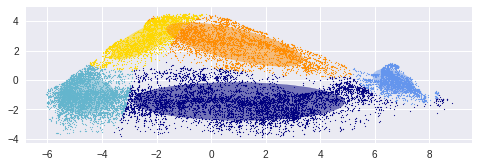

In [101]:
# Gaussian mixtures
gmm = mixture.GaussianMixture(n_components=5, covariance_type='full').fit(X_green)
plot_results(X_green, gmm.predict(X_green), gmm.means_, gmm.covariances_, 0,
             'Gaussian Mixture')

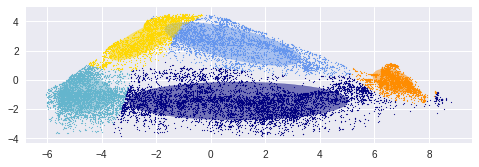

In [103]:
dpgmm = mixture.BayesianGaussianMixture(n_components=5,
                                        covariance_type='full').fit(X_green)
plot_results(X_green, dpgmm.predict(X_green), dpgmm.means_, dpgmm.covariances_, 1,
             'Bayesian Gaussian Mixture with a Dirichlet process prior')